In [1]:
import numpy as np
import pandas as pd
from scipy.special import factorial
import plotnine as p9
from scipy.stats import norm

plot_path = '/Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/'
font_size = 10

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/var/folders/v4/n9gkddks0px_3pqvr223f4_c0000gn/T/ipykernel_73515/1500555063.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/var/folders/v4/n9gkddks0px_3pqvr223f4_c0000gn/T/ipykernel_73515/1500555063.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning:

      n                    model  pct correct
0   250                  DPM-LPA         92.0
1   500                  DPM-LPA         94.0
2  1000                  DPM-LPA         92.0
0   250      finite Bayesian LPA         88.0
1   500      finite Bayesian LPA         74.0
2  1000      finite Bayesian LPA         68.0
0   250   conventional LPA (BIC)         82.0
1   500   conventional LPA (BIC)         98.0
2  1000   conventional LPA (BIC)         98.0
0   250  conventional LPA (BLRT)         74.0
1   500  conventional LPA (BLRT)         94.0
2  1000  conventional LPA (BLRT)         92.0


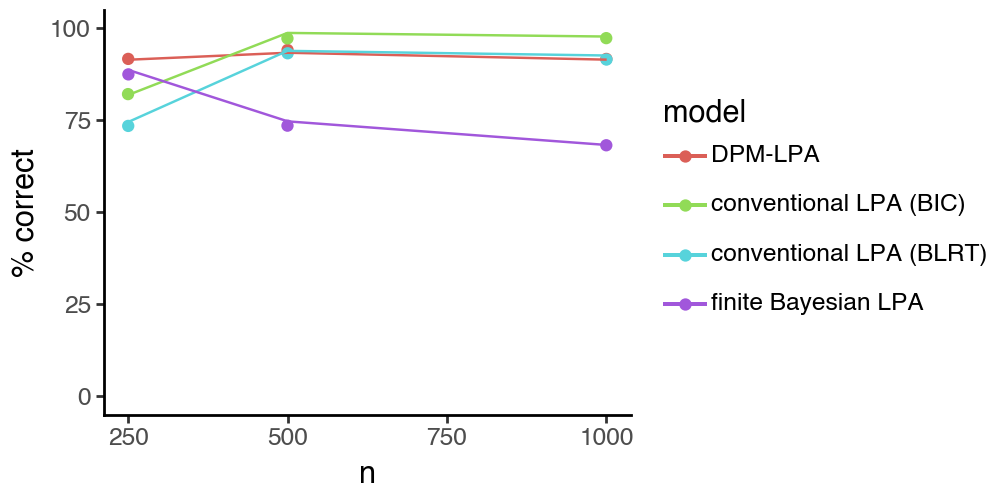

In [2]:
# make a table out of DPM-LPA simulation results

dpm_sim_results = pd.DataFrame([(n, d, m) for n in [250, 500, 1000] for d in [1.5] for m in [10]],
                               columns = ['n', 'd', 'm'])
dpm_n_profiles = pd.DataFrame(columns = ['n_profiles', 'condition_name'])

for i in range(dpm_sim_results.shape[0]):
    condition_name = 'n = ' + str(dpm_sim_results.loc[i, 'n']) + ', d = ' + str(dpm_sim_results.loc[i, 'd']) + ', m = ' + str(dpm_sim_results.loc[i, 'm'])
    try:
        foo = pd.read_csv('~/Dropbox/SamP-Arielle/LPA simulations/simulation results/DPM-LPA/' + 'DPM-LPA (200 restarts) 5 profiles, ' + condition_name + '.csv', index_col = 0)
        foo['condition_name'] = condition_name
        dpm_n_profiles = pd.concat([dpm_n_profiles, foo])
        
        dpm_sim_results.loc[i, 'n_sims'] = foo.shape[0]
        dpm_sim_results.loc[i, 'pct below'] = 100*np.round(np.mean(foo['n_profiles'] < 5), 2)
        dpm_sim_results.loc[i, 'pct correct'] = 100*np.round(np.mean(foo['n_profiles'] == 5), 2)
        dpm_sim_results.loc[i, 'pct above'] = 100*np.round(np.mean(foo['n_profiles'] > 5), 2)
        dpm_sim_results.loc[i, 'mean'] = np.round(np.mean((foo['n_profiles'])), 2)
        dpm_sim_results.loc[i, 'bias'] = np.round(np.mean((foo['n_profiles'] - 5)), 2)
        dpm_sim_results.loc[i, 'MSE'] = np.round(np.mean((foo['n_profiles'] - 5))**2, 2)
    except:
        dpm_sim_results.loc[i, ['n_sims']] = 0
        dpm_sim_results.loc[i, ['pct below', 'pct correct', 'pct above', 'mean', 'bias', 'MSE']] = np.nan

# make a table out of finite Bayesian LPA simulation results

finite_sim_results = pd.DataFrame([(n, d, m) for n in [250, 500, 1000] for d in [1.5] for m in [10]],
                                  columns = ['n', 'd', 'm'])
finite_n_profiles = pd.DataFrame(columns = ['n_profiles', 'condition_name'])

for i in range(finite_sim_results.shape[0]):
    condition_name = 'n = ' + str(finite_sim_results.loc[i, 'n']) + ', d = ' + str(finite_sim_results.loc[i, 'd']) + ', m = ' + str(finite_sim_results.loc[i, 'm'])
    try:
        foo = pd.read_csv('~/Dropbox/SamP-Arielle/LPA simulations/simulation results/finite LPA/' + 'finite LPA (200 restarts) 5 profiles, ' + condition_name + '.csv', index_col = 0)
        foo['condition_name'] = condition_name
        finite_n_profiles = pd.concat([finite_n_profiles, foo])
        
        finite_sim_results.loc[i, 'n_sims'] = foo.shape[0]
        finite_sim_results.loc[i, 'pct below'] = 100*np.round(np.mean(foo['n_profiles'] < 5), 2)
        finite_sim_results.loc[i, 'pct correct'] = 100*np.round(np.mean(foo['n_profiles'] == 5), 2)
        finite_sim_results.loc[i, 'pct above'] = 100*np.round(np.mean(foo['n_profiles'] > 5), 2)
        finite_sim_results.loc[i, 'mean'] = np.round(np.mean((foo['n_profiles'])), 2)
        finite_sim_results.loc[i, 'bias'] = np.round(np.mean((foo['n_profiles'] - 5)), 2)
        finite_sim_results.loc[i, 'MSE'] = np.round(np.mean((foo['n_profiles'] - 5))**2, 2)
    except:
        finite_sim_results.loc[i, ['n_sims']] = 0
        finite_sim_results.loc[i, ['pct below', 'pct correct', 'pct above', 'mean', 'bias', 'MSE']] = np.nan

# make a table out of ML-LPA simulation results

ml_bic_sim_results = pd.DataFrame([(n, d, m) for n in [250, 500, 1000] for d in [1.5] for m in [10]],
                                  columns = ['n', 'd', 'm'])
ml_blrt_sim_results = pd.DataFrame([(n, d, m) for n in [250, 500, 1000] for d in [1.5] for m in [10]],
                                   columns = ['n', 'd', 'm'])
ml_n_profiles = pd.DataFrame(columns = ['n_profiles', 'condition_name'])

for i in range(finite_sim_results.shape[0]):
    condition_name = 'n = ' + str(ml_bic_sim_results.loc[i, 'n']) + ', d = ' + str(ml_bic_sim_results.loc[i, 'd']) + ', m = ' + str(ml_bic_sim_results.loc[i, 'm'])
    try:
        foo = pd.read_csv('~/Dropbox/SamP-Arielle/LPA simulations/simulation results/ML-LPA/' + 'ML-LPA 5 profiles, ' + condition_name + '.csv', index_col = 0)
        foo['condition_name'] = condition_name
        ml_n_profiles = pd.concat([ml_n_profiles, foo])
        
        # BIC result
        ml_bic_sim_results.loc[i, 'n_sims'] = foo.shape[0]
        ml_bic_sim_results.loc[i, 'pct below'] = 100*np.round(np.mean(foo['bic'] < 5), 2)
        ml_bic_sim_results.loc[i, 'pct correct'] = 100*np.round(np.mean(foo['bic'] == 5), 2)
        ml_bic_sim_results.loc[i, 'pct above'] = 100*np.round(np.mean(foo['bic'] > 5), 2)
        ml_bic_sim_results.loc[i, 'mean'] = np.round(np.mean((foo['bic'])), 2)
        ml_bic_sim_results.loc[i, 'bias'] = np.round(np.mean((foo['bic'] - 5)), 2)
        ml_bic_sim_results.loc[i, 'MSE'] = np.round(np.mean((foo['bic'] - 5))**2, 2)
        
        # BLRT result
        ml_blrt_sim_results.loc[i, 'n_sims'] = foo.shape[0]
        ml_blrt_sim_results.loc[i, 'pct below'] = 100*np.round(np.mean(foo['blrt'] < 5), 2)
        ml_blrt_sim_results.loc[i, 'pct correct'] = 100*np.round(np.mean(foo['blrt'] == 5), 2)
        ml_blrt_sim_results.loc[i, 'pct above'] = 100*np.round(np.mean(foo['blrt'] > 5), 2)
        ml_blrt_sim_results.loc[i, 'mean'] = np.round(np.mean((foo['blrt'])), 2)
        ml_blrt_sim_results.loc[i, 'bias'] = np.round(np.mean((foo['blrt'] - 5)), 2)
        ml_blrt_sim_results.loc[i, 'MSE'] = np.round(np.mean((foo['blrt'] - 5))**2, 2)
    except:
        ml_bic_sim_results.loc[i, ['n_sims']] = 0
        ml_bic_sim_results.loc[i, ['pct below', 'pct correct', 'pct above', 'mean', 'bias', 'MSE']] = np.nan
        ml_blrt_sim_results.loc[i, ['n_sims']] = 0
        ml_blrt_sim_results.loc[i, ['pct below', 'pct correct', 'pct above', 'mean', 'bias', 'MSE']] = np.nan

# plot results

dpm_sim_results['model'] = 'DPM-LPA'
finite_sim_results['model'] = 'finite Bayesian LPA'
ml_bic_sim_results['model'] = 'conventional LPA (BIC)'
ml_blrt_sim_results['model'] = 'conventional LPA (BLRT)'
combo_sim_results = pd.concat([dpm_sim_results, finite_sim_results, ml_bic_sim_results, ml_blrt_sim_results])

plot = (
    p9.ggplot(combo_sim_results, p9.aes(x = 'n', y = 'pct correct', color = 'model'))
    + p9.geom_point(position = "jitter")
    + p9.geom_line(position = "jitter")
    + p9.ylab('% correct')
    + p9.ylim([0, 100])
    + p9.theme_classic()
    + p9.theme(figure_size = [5, 2.5])
    + p9.scale_x_continuous(breaks = [250, 500, 750, 1000])
)
plot.save(plot_path + 'simulation results', dpi = 300)
print(combo_sim_results[['n', 'model', 'pct correct']])
plot

In [3]:
def factorial(n):
    return np.prod(np.array([n - i for i in range(n)]))

def log_factorial(n):
    return np.sum(np.log(np.array([n - i for i in range(n)])))

def rising_factorial(x, n):
    return np.prod(np.array([x + i for i in range(n)]))

def log_rising_factorial(x, n):
    return np.sum(np.log(np.array([x + i for i in range(n)])))

In [4]:
# See https://www.cs.cmu.edu/~kbe/dp_tutorial.pdf, slide 16.

def partition_prob(counts, alpha = 1):
    k = np.shape(counts)[0] # number of distinct clusters/profiles
    N = np.sum(counts) # total number of observations/participants
    return (alpha**k)*np.prod([factorial(c - 1) for c in counts])/rising_factorial(alpha, N)

In [5]:
def log_partition_prob(counts, alpha = 1):
    k = np.shape(counts)[0] # number of distinct clusters/profiles
    N = np.sum(counts) # total number of observations/participants
    return k*np.log(alpha) + np.sum([log_factorial(c - 1) for c in counts]) - log_rising_factorial(alpha, N)

   # profiles  $p(z_{1:n})$ (log-scale)
0           1                      -8.5
1           2                   -3476.9
2           3                   -5212.1
3           4                   -6080.5
4           5                   -6515.3


/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/p(z) by number of profiles


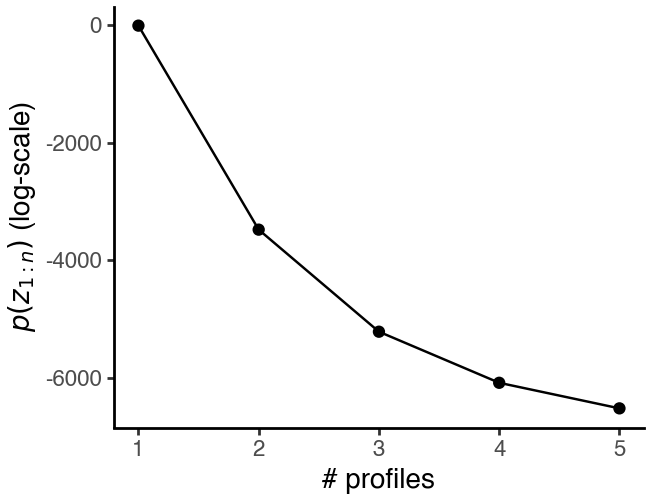

In [6]:
figure_size = (3.25, 2.5)

counts_list = [np.array([5000]), 
               np.array([2500, 2500]),
               np.array([2500, 1250, 1250]),
               np.array([2500, 1250, 625, 625]),
               np.array([2500, 1250, 625, 313, 312])]
    
plot_df = pd.DataFrame({'# profiles': [1, 2, 3, 4, 5], '$p(z_{1:n})$ (log-scale)': 5*[0.0]})
for i in range(5):
    plot_df.loc[plot_df['# profiles'] == i + 1, '$p(z_{1:n})$ (log-scale)'] = np.round(log_partition_prob(counts_list[i], alpha = 1), 1)
print(plot_df)
plot = p9.ggplot(plot_df, p9.aes(x = '# profiles', y = '$p(z_{1:n})$ (log-scale)'))
plot += p9.geom_point()
plot += p9.geom_line()
plot += p9.theme_classic(base_size = font_size)
plot += p9.theme(figure_size = figure_size)
plot.save(plot_path + 'p(z) by number of profiles', dpi = 300)
plot

In [7]:
np.sum([log_factorial(c - 1) for c in counts_list[2]])

32379.07616331216

In [8]:
np.sum(np.array([2500, 1250, 625, 313, 312]))

5000

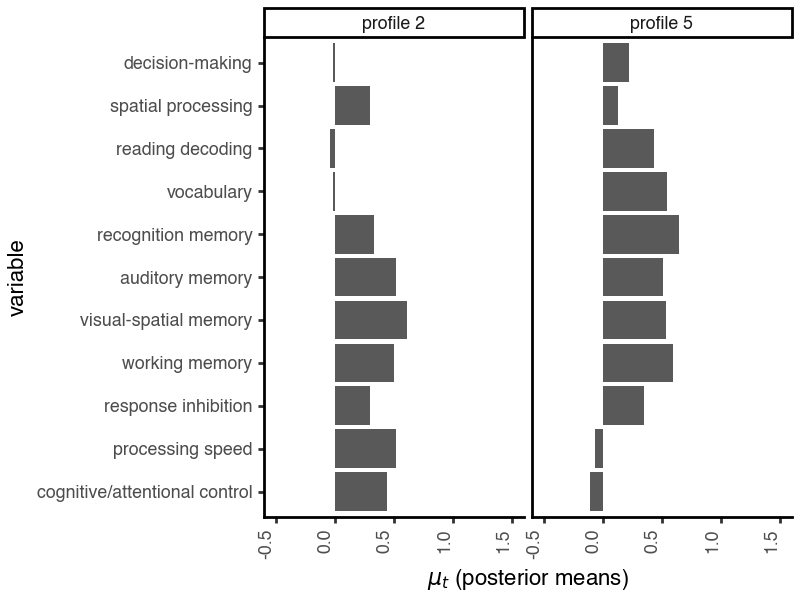

In [9]:
# mean vectors (mu) of the two most similar profiles from conventional LPA with 20 profiles
# the two most similar profiles were profile 2 and profile 5
figure_size = [4, 3]
font_size = 8

nice_x_names = pd.Series({'two_back': 'working memory',
                          'recog_dprime': 'recognition memory',
                          'neg_ssrt': 'response inhibition',
                          'picvocab': 'vocabulary',
                          'flanker': 'cognitive/attentional control',
                          'pattern': 'processing speed',
                          'picture': 'visual-spatial memory',
                          'reading': 'reading decoding',
                          'dice': 'decision-making',
                          'ravlt': 'auditory memory',
                          'little_man': 'spatial processing'})
m = nice_x_names.shape[0]
x_name_order = ['cognitive/attentional control', 'processing speed', 'response inhibition', 'working memory',
                'visual-spatial memory', 'auditory memory', 'recognition memory',
                'vocabulary', 'reading decoding', 'spatial processing', 'decision-making']

sim_df = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/most_similar_profiles.csv')
sim_df.columns = ['variable', 'mu5', 'mu2']

x_names = pd.Categorical(pd.concat(2*[nice_x_names[sim_df['variable'].values]]),
                         categories = x_name_order, 
                         ordered = True)

plot_df = pd.DataFrame({'mu': np.concatenate([sim_df['mu5'].values, sim_df['mu2'].values]),
                        'profile': m*['profile ' + str(5)] + m*['profile ' + str(2)],
                        'variable': x_names})
plot = p9.ggplot(plot_df, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.scales.ylim([-0.5, 1.5])
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size, axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 2)
plot += p9.coord_flip()
plot += p9.ylab('$\\mu_t$ (posterior means)')
#plot.save(plot_path + 'conventional LPA (20 profile) most similar profiles', dpi = 300)
plot

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4.5 x 3 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/conventional LPA (3 profile) profile means


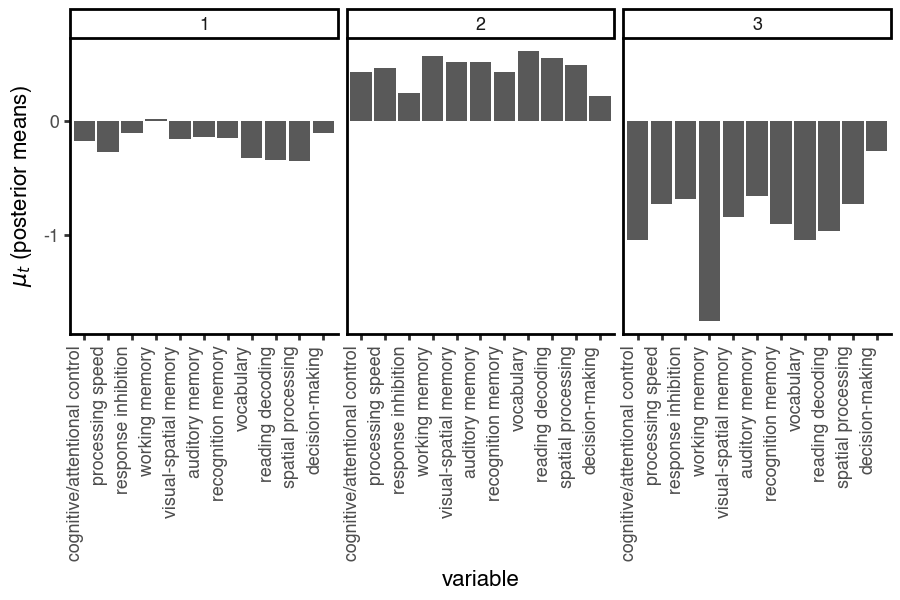

In [10]:
# profile means of the 3 profile conventional LPA model

clpa3_means = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional 3 profile LPA means.csv')

x_names = pd.Categorical(nice_x_names[clpa3_means['variable'].values],
                         x_name_order, 
                         ordered = True)

clpa3_means['variable'] = x_names

plot = p9.ggplot(clpa3_means, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = [3*1.5, 3], axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 3)
plot += p9.ylab('$\\mu_t$ (posterior means)')
plot.save(plot_path + 'conventional LPA (3 profile) profile means', dpi = 300)
plot

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.0 x 3 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/conventional LPA (4 profile) profile means


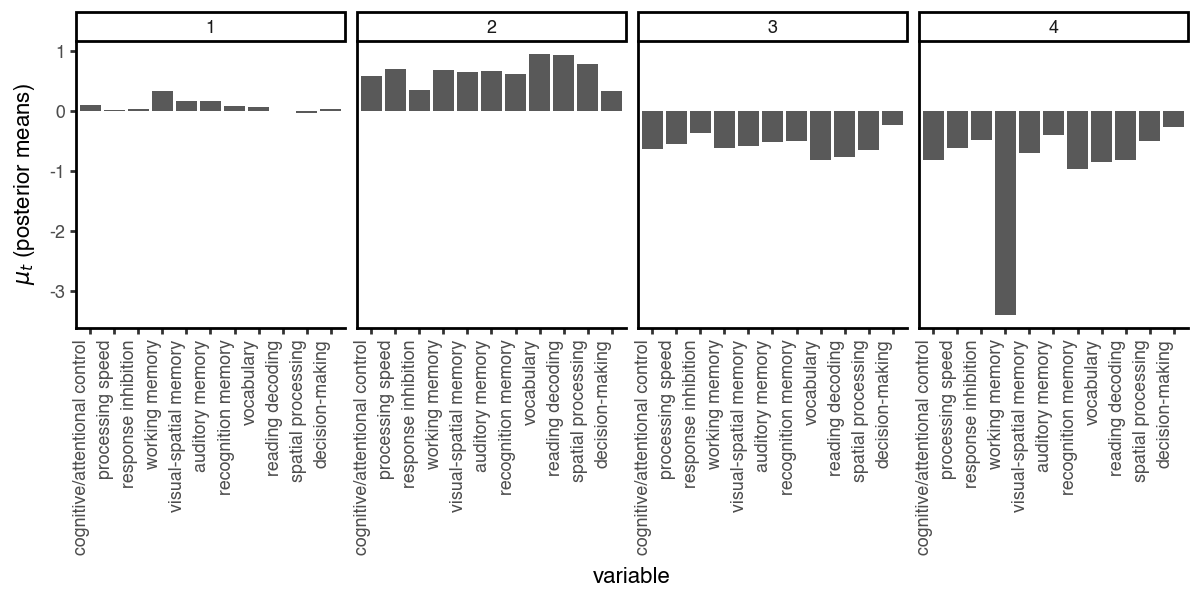

In [11]:
# profile means of the 4 profile conventional LPA model

clpa4_means = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional 4 profile LPA means.csv')

x_names = pd.Categorical(nice_x_names[clpa4_means['variable'].values],
                         x_name_order, 
                         ordered = True)

clpa4_means['variable'] = x_names

plot = p9.ggplot(clpa4_means, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = [4*1.5, 3], axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 4)
plot += p9.ylab('$\\mu_t$ (posterior means)')
plot.save(plot_path + 'conventional LPA (4 profile) profile means', dpi = 300)
plot

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7.5 x 3 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/conventional LPA (5 profile) profile means


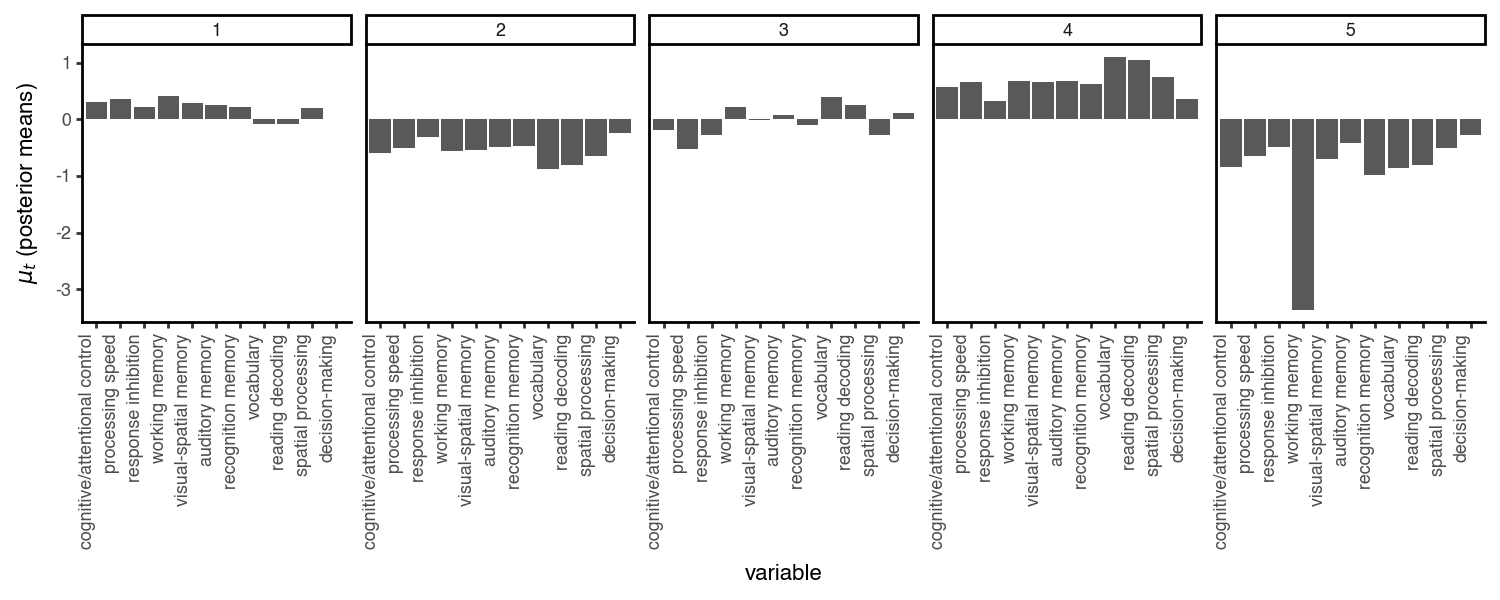

In [12]:
# profile means of the 5 profile conventional LPA model

clpa5_means = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional 5 profile LPA means.csv')

x_names = pd.Categorical(nice_x_names[clpa5_means['variable'].values],
                         x_name_order, 
                         ordered = True)
clpa5_means['variable'] = x_names

plot = p9.ggplot(clpa5_means, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = [5*1.5, 3], axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 5)
plot += p9.ylab('$\\mu_t$ (posterior means)')
plot.save(plot_path + 'conventional LPA (5 profile) profile means', dpi = 300)
plot

In [13]:
# import fits stats from conventional LPA fits
fit_stats = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional LPA fit stats.csv',
                        index_col = 0)
fit_stats = fit_stats.rename(columns = {'Classes': '# profiles', 'Entropy': 'entropy reduction'})
fit_stats

,Model,# profiles,AIC,BIC,entropy reduction,prob_min,prob_max,n_min,n_max,BLRT_p,log-likelihood
1,1,1,158018.17,158162.54,1.00,1.00,1.00,1.00,1.00,NaN,-78987.083186
2,1,2,151970.99,152194.11,0.75,0.88,0.95,0.34,0.66,0.01,-73470.850817
3,1,3,150232.47,150534.34,0.76,0.86,0.90,0.07,0.47,0.01,-71717.001183
4,1,4,148852.79,149233.42,0.78,0.78,0.95,0.02,0.59,0.01,-70448.885195
5,1,5,148550.88,149010.26,0.68,0.61,0.94,0.02,0.41,0.01,-69501.383593
6,1,6,148013.71,148551.84,0.69,0.63,0.96,0.02,0.36,0.01,-68721.227168
7,1,7,147805.70,148422.58,0.71,0.56,0.95,0.01,0.46,0.01,-68359.949904
8,1,8,147516.45,148212.08,0.69,0.61,0.96,0.01,0.38,0.01,-67707.121763
9,1,9,147301.03,148075.41,0.70,0.57,0.95,0.01,0.42,0.01,-67280.942058
10,1,10,147063.32,147916.45,0.70,0.58,0.96,0.01,0.38,0.01,-66916.755829


/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/entropy reduction by n profiles


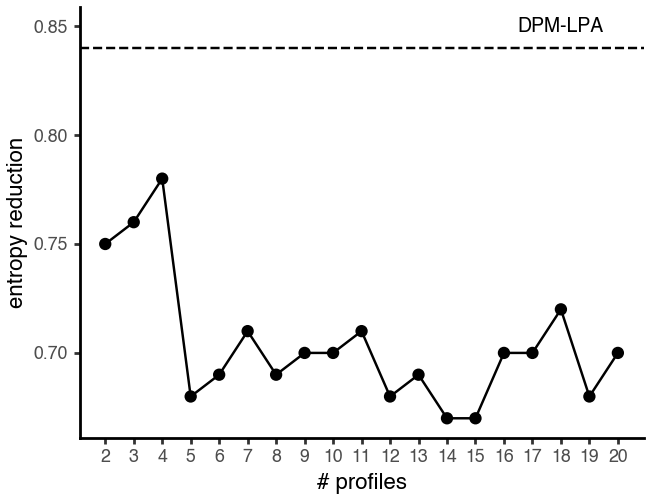

In [14]:
# relative entropy reduction by number of profiles
figure_size = (3.25, 2.5)

plot_entred = p9.ggplot(fit_stats.loc[fit_stats['# profiles'] > 1, :], p9.aes(x = '# profiles', y = 'entropy reduction')) + p9.geom_point() + p9.geom_line()
plot_entred += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_entred += p9.geom_hline(yintercept = 0.84, linetype = 'dashed')
plot_entred += p9.scale_x_continuous(breaks = range(1, 21))
plot_entred += p9.annotate('text', x = 18, y = 0.85, 
                         label = 'DPM-LPA',
                         size = font_size - 1)
plot_entred.save(plot_path + 'entropy reduction by n profiles', dpi = 300)
plot_entred

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7 x 4 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/entropy reduction by n profiles (poster version)


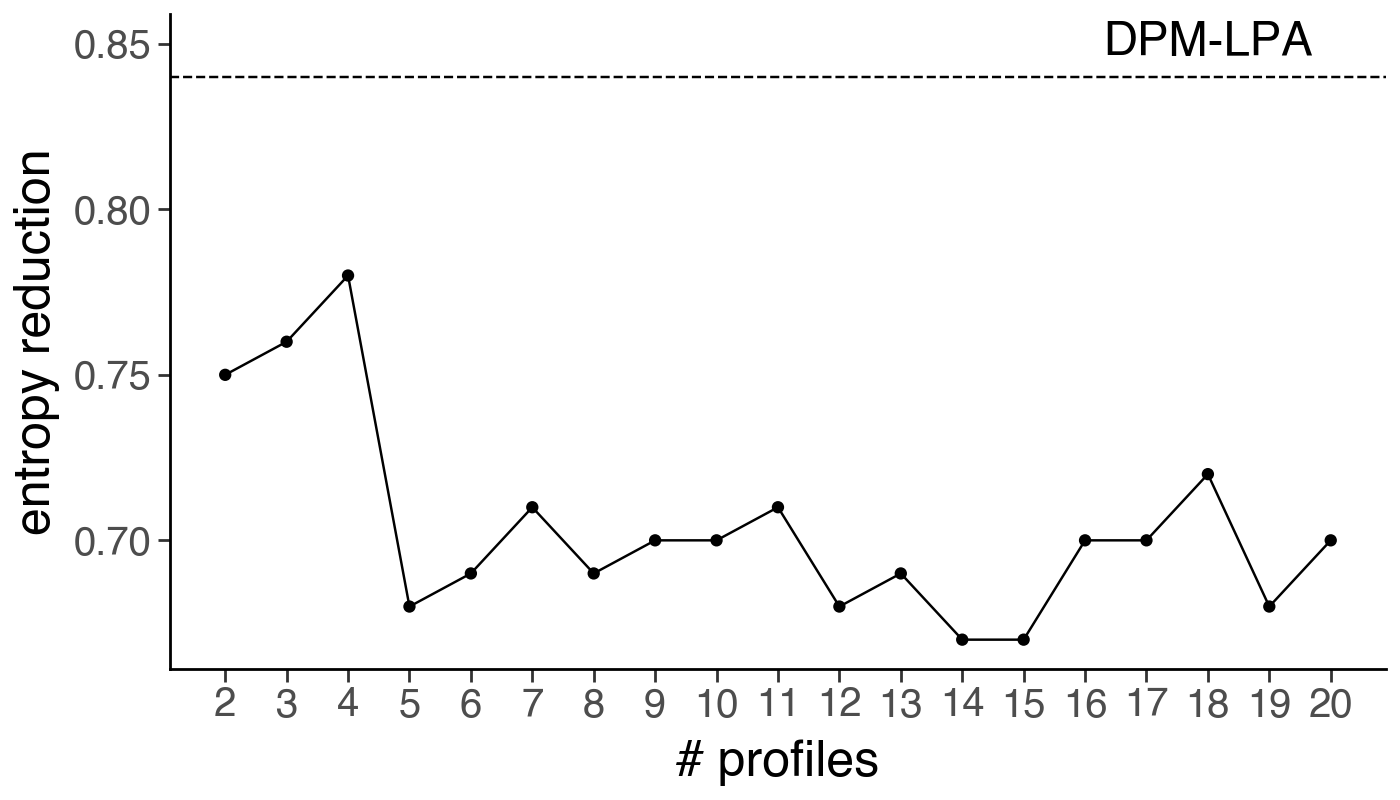

In [15]:
# relative entropy reduction by number of profiles VERSION FOR POSTER
poster_figure_size = (7, 4)
poster_font_size = 18

plot_entred = p9.ggplot(fit_stats.loc[fit_stats['# profiles'] > 1, :], p9.aes(x = '# profiles', y = 'entropy reduction')) + p9.geom_point() + p9.geom_line()
plot_entred += p9.theme_classic(base_size = poster_font_size) + p9.theme(figure_size = poster_figure_size)
plot_entred += p9.geom_hline(yintercept = 0.84, linetype = 'dashed')
plot_entred += p9.scale_x_continuous(breaks = range(1, 21, 1))
plot_entred += p9.annotate('text', x = 18, y = 0.85, 
                         label = 'DPM-LPA',
                         size = poster_font_size - 1)
plot_entred.save(plot_path + 'entropy reduction by n profiles (poster version)', dpi = 300)
plot_entred

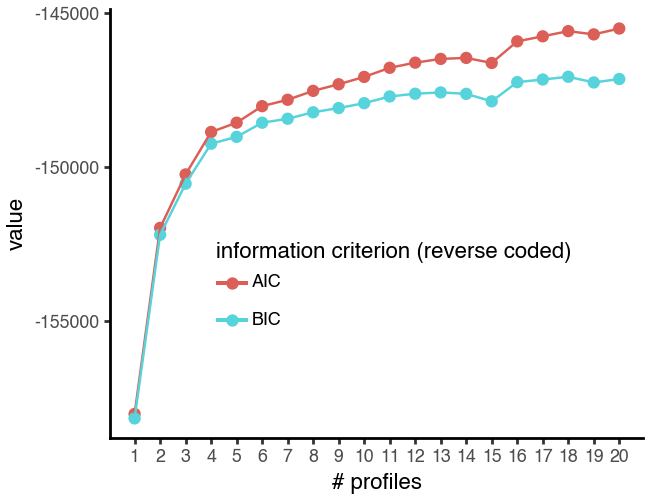

In [16]:
# AIC and BIC by number of profiles
plot_df = pd.DataFrame({'# profiles': 2*list(np.arange(1, 21)),
                        'information criterion (reverse coded)': 20*['AIC'] + 20*['BIC'],
                        'value': 0.0})
plot_df['value'] = np.concatenate([-fit_stats['AIC'].values, -fit_stats['BIC'].values])

plot_aic_bic = p9.ggplot(plot_df, p9.aes(x = '# profiles', y = 'value', color = 'information criterion (reverse coded)'))
plot_aic_bic += p9.geom_point()
plot_aic_bic += p9.geom_line()
plot_aic_bic += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size, legend_position = (0.6, 0.3))
plot_aic_bic += p9.scale_x_continuous(breaks = range(21))
#plot_aic_bic.save(plot_path + 'AIC and BIC by n profiles', dpi = 300)
plot_aic_bic

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7 x 4 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/AIC and BIC by n profiles (poster version)


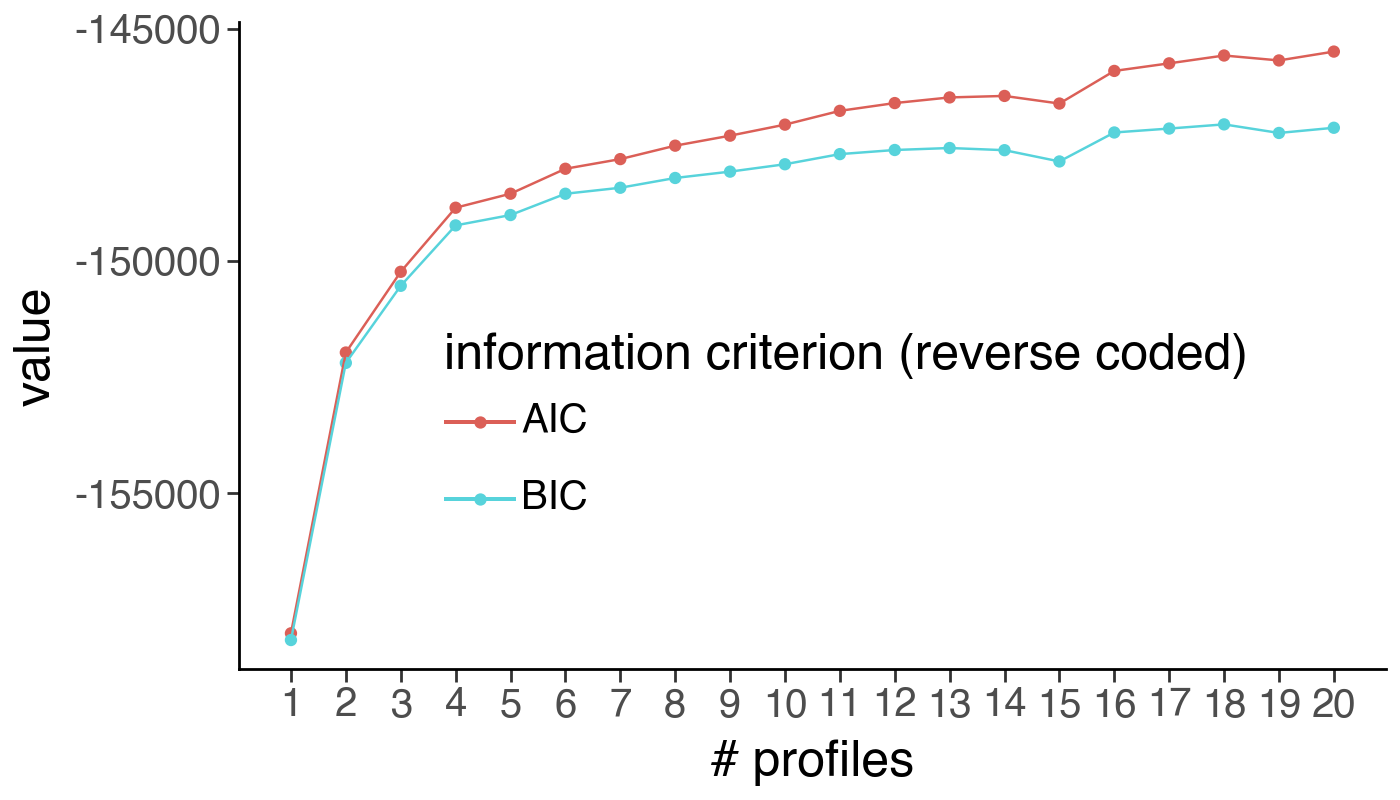

In [17]:
 # AIC and BIC by number of profiles POSTER VERSION
plot_df = pd.DataFrame({'# profiles': 2*list(np.arange(1, 21)),
                        'information criterion (reverse coded)': 20*['AIC'] + 20*['BIC'],
                        'value': 0.0})
plot_df['value'] = np.concatenate([-fit_stats['AIC'].values, -fit_stats['BIC'].values])

plot_aic_bic = p9.ggplot(plot_df, p9.aes(x = '# profiles', y = 'value', color = 'information criterion (reverse coded)'))
plot_aic_bic += p9.geom_point()
plot_aic_bic += p9.geom_line()
plot_aic_bic += p9.theme_classic(base_size = poster_font_size) + p9.theme(figure_size = poster_figure_size, legend_position = (0.6, 0.3))
plot_aic_bic += p9.scale_x_continuous(breaks = range(21))
plot_aic_bic.save(plot_path + 'AIC and BIC by n profiles (poster version)', dpi = 300)
plot_aic_bic

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/min distance by n profiles


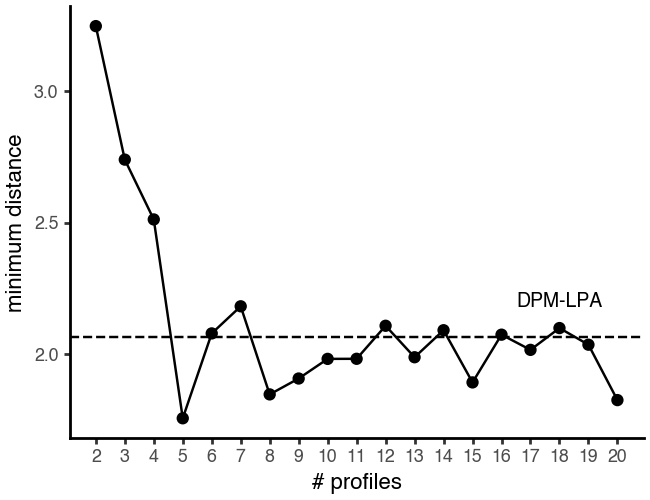

In [18]:
# min profile distance by number of profiles
sim_by_profiles = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional LPA similarity results by n profiles.csv',
                              index_col = 0)
sim_by_profiles = sim_by_profiles.rename(columns = {'n_profiles': '# profiles'})

plot_min = p9.ggplot(sim_by_profiles, p9.aes(x = '# profiles', y = 'minimum distance')) + p9.geom_point() + p9.geom_line()
plot_min += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_min += p9.geom_hline(yintercept = 2.06528082, linetype = 'dashed')
plot_min += p9.annotate('text', x = 18, y = 2.2, 
                        label = 'DPM-LPA',
                        size = font_size - 1)
plot_min += p9.scale_x_continuous(breaks = range(1, 21))
plot_min.save(plot_path + 'min distance by n profiles', dpi = 300)
plot_min

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/mean distance by n profiles


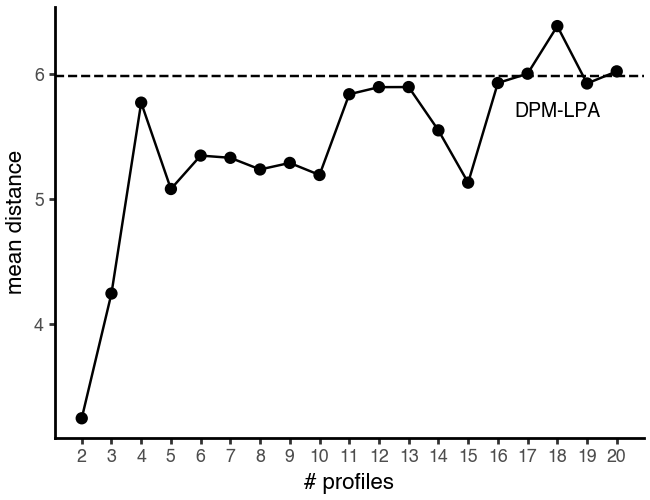

In [19]:
# mean profile distance by number of profiles

plot_mean = p9.ggplot(sim_by_profiles, p9.aes(x = '# profiles', y = 'mean distance')) + p9.geom_point() + p9.geom_line()
plot_mean += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_mean += p9.geom_hline(yintercept = 5.98958423, linetype = 'dashed')
plot_mean += p9.annotate('text', x = 18, y = 5.7, 
                        label = 'DPM-LPA',
                        size = font_size - 1)
plot_mean += p9.scale_x_continuous(breaks = range(1, 21))
plot_mean.save(plot_path + 'mean distance by n profiles', dpi = 300)
plot_mean

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7 x 4 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/mean distance by n profiles (poster version)


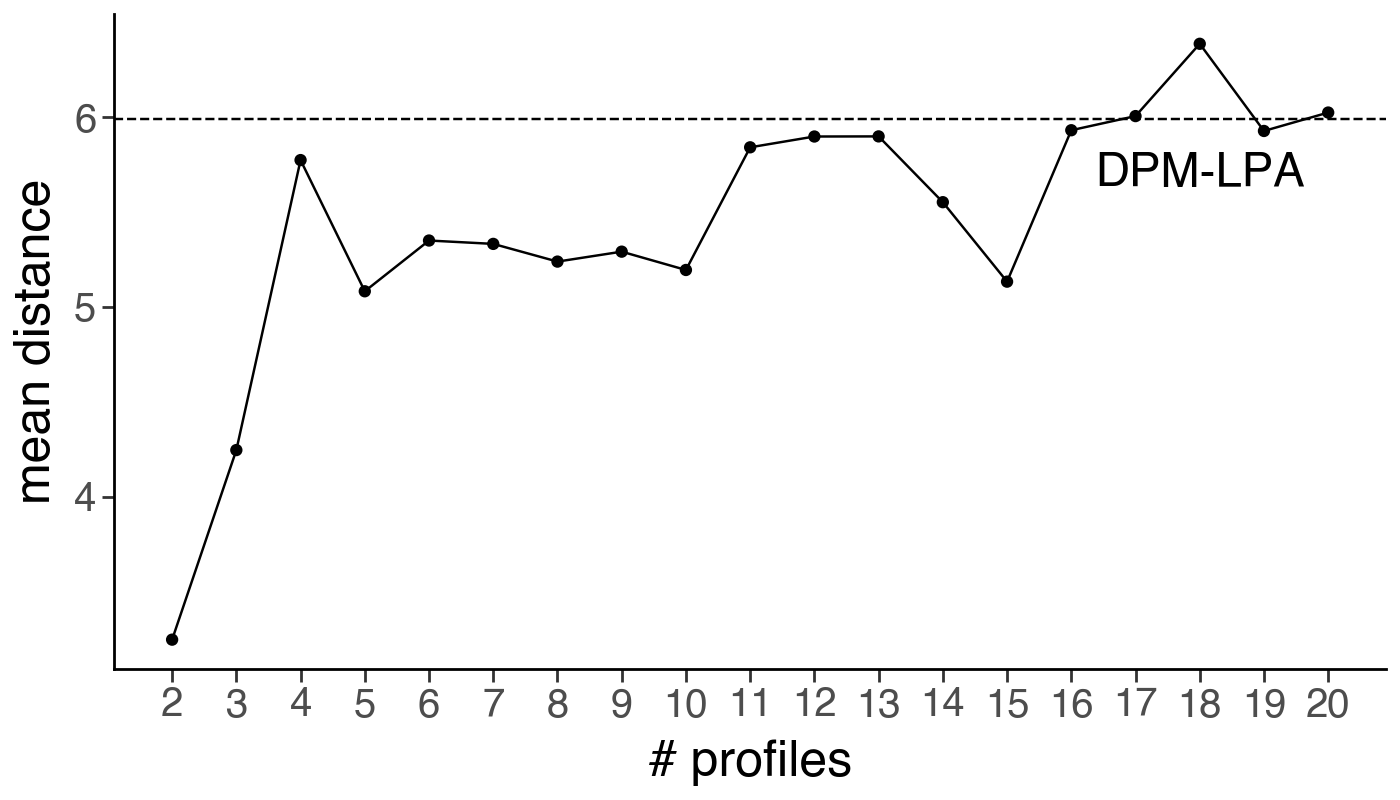

In [28]:
# mean profile distance by number of profiles VERSION FOR POSTER

plot_mean = p9.ggplot(sim_by_profiles, p9.aes(x = '# profiles', y = 'mean distance')) + p9.geom_point() + p9.geom_line()
plot_mean += p9.theme_classic(base_size = poster_font_size) + p9.theme(figure_size = poster_figure_size)
plot_mean += p9.geom_hline(yintercept = 5.98958423, linetype = 'dashed')
plot_mean += p9.annotate('text', x = 18, y = 5.7, 
                        label = 'DPM-LPA',
                        size = poster_font_size - 1)
plot_mean += p9.scale_x_continuous(breaks = range(1, 21))
plot_mean.save(plot_path + 'mean distance by n profiles (poster version)', dpi = 300)
plot_mean

In [21]:
sim_by_profiles

,# profiles,mean similarity,max similarity,mean distance,minimum distance
1,2,0.005134,0.005134,3.247107,3.247107
2,3,0.008060,0.023426,4.245831,2.740047
3,4,0.008399,0.042547,5.773606,2.512822
4,5,0.026637,0.213390,5.082452,1.757632
5,6,0.017954,0.114969,5.349826,2.079946
6,7,0.013971,0.092311,5.332088,2.182928
7,8,0.016729,0.181197,5.238810,1.848334
8,9,0.013253,0.161783,5.291164,1.908666
9,10,0.011668,0.139934,5.194678,1.983221
10,11,0.008667,0.139844,5.840887,1.983547


In [22]:
# plot examples of LPA clustering in two dimensions
figure_size = [2.5, 2]
font_size = 10
n_t = 20
plot_df = pd.DataFrame({'x1': np.zeros(3*n_t),
                        'x2': np.zeros(3*n_t),
                        'true profile': n_t*['1'] + n_t*['2'] + n_t*['3']})
plot_df.loc[plot_df['true profile'] == '1', 'x1'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '1', 'x2'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', 'x1'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', 'x2'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', 'x1'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', 'x2'] = norm.rvs(loc = 1.2, scale = 0.4, size = n_t)

# true profiles
true_lpa_df = plot_df.copy()
true_lpa_df = true_lpa_df.rename(columns = {'true profile': 'profile'})
true_lpa_plot = p9.ggplot(true_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
true_lpa_plot += p9.geom_point()
true_lpa_plot += p9.scales.xlim([-0.5, 5.2])
true_lpa_plot += p9.scales.ylim([-0.5, 5.2])
true_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too few profiles
small_lpa_df = plot_df.copy()
small_lpa_df['profile'] = n_t*['1'] + 2*n_t*['2']
small_lpa_plot = p9.ggplot(small_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
small_lpa_plot += p9.geom_point()
small_lpa_plot += p9.scales.xlim([-0.5, 5.2])
small_lpa_plot += p9.scales.ylim([-0.5, 5.2])
small_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too many profiles
large_lpa_df = plot_df.copy()
large_lpa_df['profile'] = n_t*['1'] + n_t*['2'] + int(n_t/2)*['3'] + int(n_t/2)*['4']
large_lpa_plot = p9.ggplot(large_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
large_lpa_plot += p9.geom_point()
large_lpa_plot += p9.scales.xlim([-0.5, 5.2])
large_lpa_plot += p9.scales.ylim([-0.5, 5.2])
large_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# plot examples of LPA clustering in two dimensions
figure_size = [2.5, 2]
font_size = 10
n_t = 20
plot_df = pd.DataFrame({'$x_1$': np.zeros(3*n_t),
                        '$x_2$': np.zeros(3*n_t),
                        'true profile': n_t*['1'] + n_t*['2'] + n_t*['3']})
plot_df.loc[plot_df['true profile'] == '1', '$x_1$'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '1', '$x_2$'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', '$x_1$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', '$x_2$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', '$x_1$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', '$x_2$'] = norm.rvs(loc = 1.2, scale = 0.4, size = n_t)

# true profiles
true_lpa_df = plot_df.copy()
true_lpa_df = true_lpa_df.rename(columns = {'true profile': 'profile'})

true_lpa_plot = p9.ggplot(true_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
true_lpa_plot += p9.geom_point()
true_lpa_plot += p9.scales.xlim([-0.5, 5.2])
true_lpa_plot += p9.scales.ylim([-0.5, 5.2])
true_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too few profiles
small_lpa_df = plot_df.copy()
small_lpa_df['profile'] = n_t*['1'] + 2*n_t*['2']

small_lpa_plot = p9.ggplot(small_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
small_lpa_plot += p9.geom_point()
small_lpa_plot += p9.scales.xlim([-0.5, 5.2])
small_lpa_plot += p9.scales.ylim([-0.5, 5.2])
small_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too many profiles
large_lpa_df = plot_df.copy()
large_lpa_df['profile'] = n_t*['1'] + n_t*['2'] + int(n_t/2)*['3'] + int(n_t/2)*['4']
large_lpa_plot = p9.ggplot(large_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
large_lpa_plot += p9.geom_point()
large_lpa_plot += p9.scales.xlim([-0.5, 5.2])
large_lpa_plot += p9.scales.ylim([-0.5, 5.2])
large_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

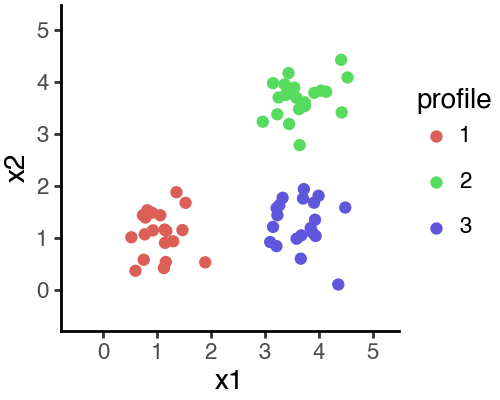

In [23]:
#true_lpa_plot.save(plot_path + '2-dim true profiles', dpi = 300)
true_lpa_plot

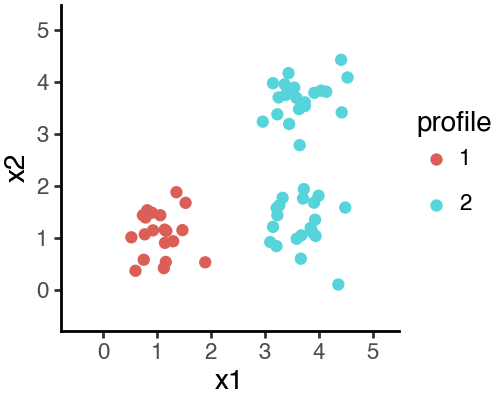

In [24]:
#small_lpa_plot.save(plot_path + '2-dim LPA with too few profiles', dpi = 300)
small_lpa_plot

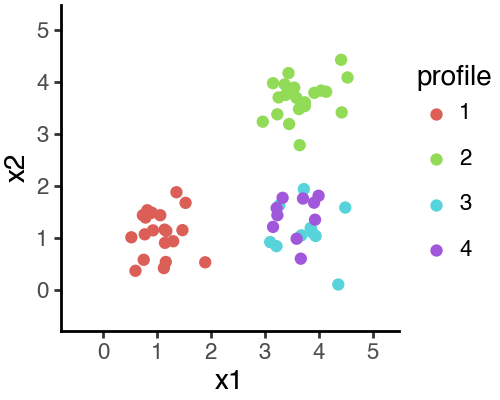

In [25]:
#large_lpa_plot.save(plot_path + '2-dim LPA with too many profiles', dpi = 300)
large_lpa_plot

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 2.5 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/similarity_figure_a


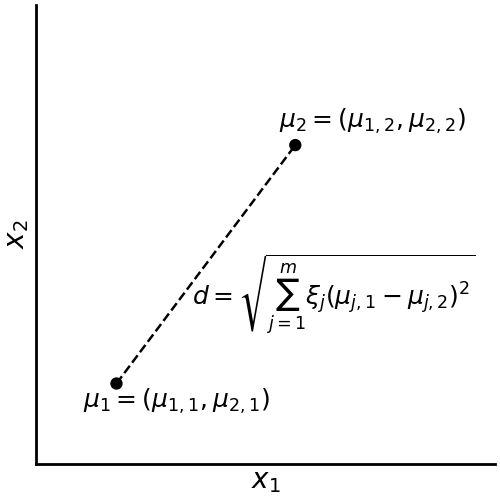

In [26]:
# first similarity figure
plot_a = p9.ggplot(data = pd.DataFrame({'$x_1$': [1, 4], '$x_2$': [1, 5]}),
                   mapping = p9.aes(x = '$x_1$', y = '$x_2$'))
plot_a += p9.geom_point()
plot_a += p9.geom_line(linetype = 'dashed')
plot_a += p9.annotate('text', x = 2, y = 0.7, 
                      label = '$\mu_1 = (\mu_{1,1}, \mu_{2,1})$',
                      size = font_size - 1)
plot_a += p9.annotate('text', x = 5.3, y = 5.4, 
                      label = '$\mu_2 = (\mu_{1,2}, \mu_{2,2})$',
                      size = font_size - 1)
plot_a += p9.annotate('text', x = 4.65, y = 2.5, 
                      label = '$d = \sqrt{\sum_{j=1}^m \\xi_j (\mu_{j,1} - \mu_{j,2})^2}$',
                      size = font_size - 1)
plot_a += p9.theme_classic(base_size = font_size)
plot_a += p9.scale_x_continuous(limits = [0, 7], breaks = [], labels = [])
plot_a += p9.scale_y_continuous(limits = [0, 7], breaks = [], labels = [])
plot_a += p9.theme(figure_size = [2.5, 2.5])
plot_a.save(plot_path + 'similarity_figure_a', dpi = 300)
plot_a

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 2.5 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/similarity_figure_b


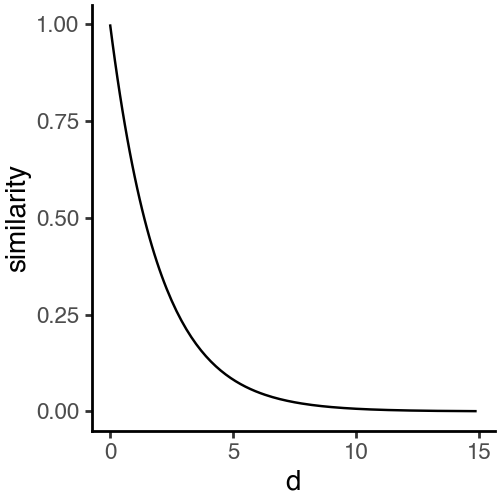

In [27]:
# second similarity figure
plot_b = p9.ggplot(data = pd.DataFrame({'d': np.arange(0, 15, 0.1), 'similarity': np.exp(-0.5*np.arange(0, 15, 0.1))}),
                   mapping = p9.aes(x = 'd', y = 'similarity'))
plot_b += p9.geom_line()
plot_b += p9.theme_classic(base_size = font_size)
plot_b += p9.theme(figure_size = [2.5, 2.5])
plot_b.save(plot_path + 'similarity_figure_b', dpi = 300)
plot_b